#### SPA6330: Artificial Intelligence and Machine Learning
#### MO: Dr Linda Cremonesi

# Midterm Project - Identifying Pulsars

## Deadline: Friday 1st March 2024 23.59

<hr style="border:2px solid gray">

## Expectations

This assessment is worth 25% of the final module mark.

All projects are required to be submitted as Jupyter Notebooks with accompanying PDFs. If no code is provided, the project will be graded at zero. If the code provided doesn’t reproduce the work shown in the report, only the sections with the working code will be marked.



<hr style="border:2px solid gray">

## Problem formulation:
This week we are identifying pulsars: Lyon,Robert. (2017). HTRU2. UCI Machine Learning Repository. https://doi.org/10.24432/C5DK6R.

The dataset features represent the statistical properties of the integrated pulsed profile and DM-SNR curve.

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.

The last column tells you if the instance refers to a pulsar (1) or not (0). 

*Define the problem that we want to solve and give an overview of the background details that will inform our analysis. [/5]*



The problem is to make Predictions on whether instances correspond to a pulsar or not, given the integrated pulsar profile and DN-SNR curves.




<hr style="border:2px solid gray">

## Data preparation and feature engineering: 
*Prepare the data for training, such as cleaning and transforming it. This may involve removing outliers, imputing missing values, and normalising the data. Select the features that are most important for the problem. This may involve creating new features or removing irrelevant features. Use data visualisation to help inform your choices. [/25]*

 -  *Code [/10]: the code works; it is well-written, formatted, and appropriately explained.*
 -	*Figures [/10]: the figures are relevant to the tasks, they have legends and axis titles, and the figures are easily readable and interpretable.*
 -	*Text [/5]: the text justifies the preprocessing appropriately.*


In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['Mean_IP', 'Std_IP', 'Excess_Kurtosis_IP', 'Skewness_IP', 'Mean_DMSNR', 'Std_DMSNR','Excess_Kurtosis_DMSNR', 'Skewness_DMSNR', 'Pulsar_or_Not']

data = pd.read_csv("HTRU_2.csv",names = columns)
print(data.head())
print(data.info())
print(data.describe())

      Mean_IP     Std_IP  Excess_Kurtosis_IP  Skewness_IP  Mean_DMSNR  \
0  140.562500  55.683782           -0.234571    -0.699648    3.199833   
1  102.507812  58.882430            0.465318    -0.515088    1.677258   
2  103.015625  39.341649            0.323328     1.051164    3.121237   
3  136.750000  57.178449           -0.068415    -0.636238    3.642977   
4   88.726562  40.672225            0.600866     1.123492    1.178930   

   Std_DMSNR  Excess_Kurtosis_DMSNR  Skewness_DMSNR  Pulsar_or_Not  
0  19.110426               7.975532       74.242225              0  
1  14.860146              10.576487      127.393580              0  
2  21.744669               7.735822       63.171909              0  
3  20.959280               6.896499       53.593661              0  
4  11.468720              14.269573      252.567306              0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                 Non-Null Co

This section imports the data and add the column heading. It allows me to check what is in the data and if there is work that needs to be done to the data within the data frame, before it can be used.

In [13]:
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
print(data.head())
print(data.info())
print(data['Pulsar_or_Not'].value_counts())

      Mean_IP     Std_IP  Excess_Kurtosis_IP  Skewness_IP  Mean_DMSNR  \
0  140.562500  55.683782           -0.234571    -0.699648    3.199833   
1  102.507812  58.882430            0.465318    -0.515088    1.677258   
2  103.015625  39.341649            0.323328     1.051164    3.121237   
3  136.750000  57.178449           -0.068415    -0.636238    3.642977   
4   88.726562  40.672225            0.600866     1.123492    1.178930   

   Std_DMSNR  Excess_Kurtosis_DMSNR  Skewness_DMSNR  Pulsar_or_Not  
0  19.110426               7.975532       74.242225              0  
1  14.860146              10.576487      127.393580              0  
2  21.744669               7.735822       63.171909              0  
3  20.959280               6.896499       53.593661              0  
4  11.468720              14.269573      252.567306              0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                 Non-Null Co

The code above ensures that the data is clean and has no duplicates or incomplete data so that it can be used successfully through the training and testing of the ml model.

In [17]:
x = data.drop('Pulsar_or_Not',axis = 1) # Pulsar_or_Not is our target class so is dropped and separated from the data
y = data['Pulsar_or_Not']

scaler = StandardScaler()
scaledx = scaler.fit_transform(x)

This separates the targeted class from the rest of the data and then scales the data to ensure data is good for use.

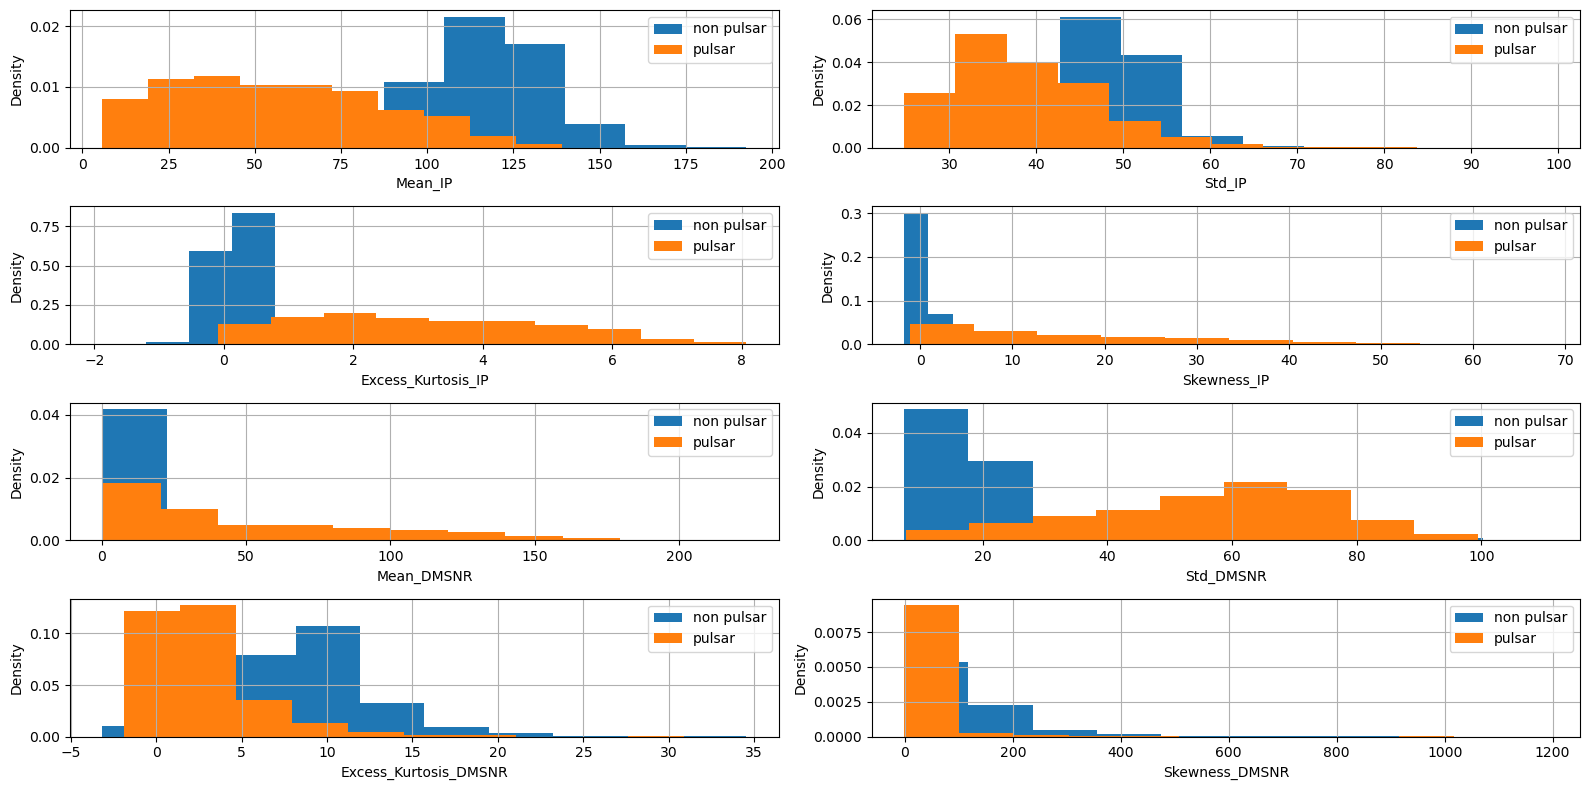

In [35]:
def hist(x,y):
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 8))
    axes = axes.flatten()
    for i, col in enumerate(x.columns):
        x[y == 0][col].hist(ax=axes[i], label='non pulsar', density=True)
        x[y == 1][col].hist(ax=axes[i], label='pulsar', density=True)
        axes[i].legend()
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Density')
    plt.tight_layout()
    plt.show()

hist(x,y)

This code plots histograms; these diagrams show the differences in how the pulsar and non pulsar behave.

<hr style="border:2px solid gray">

## Model selection and training: 
*Choose the machine learning algorithm and justify your choice. Explain how the algorithm works and, if helpful, include a diagram. Train the algorithm with default parameters and evaluate the default model with suitable metrics. [/20]*

 - *Code [/10]: the code works; it is well-written, formatted, and appropriately explained.*
 - *Figures [/5]: a diagram of the method is presented and clearly interpretable.*
 - *Text [/5]: the text explains why the model was chosen, how it works, advantages and drawbacks.*


In [48]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

This imports SVC model 

In [41]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

xtrainscaled = scaler.fit_transform(xtrain)
xtestscaled = scaler.fit_transform(xtest)

In [42]:
svm_model = SVC(random_state=42)
svm_model.fit(xtrainscaled,ytrain)

SVC(random_state=42)

<hr style="border:2px solid gray">

## Model evaluation: 
*Choose a cross-validation strategy and appropriate metrics to evaluate the model performance. Make at least two plots to demonstrate the performance of your model. [/25]*
- *Code [/10]: the code works; it is well-written, formatted, and appropriately explained.*
- *Figures [/10]: the figures are relevant to the tasks, they have legends and axis titles, and the figures are easily readable and interpretable.*
- *Text [/5]: the text interprets the results of the cross validation with a diagnosis of possible problems.*


In [43]:
ypred = svm_model.predict(xtestscaled)

In [49]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3259
           1       0.94      0.82      0.88       321

    accuracy                           0.98      3580
   macro avg       0.96      0.91      0.93      3580
weighted avg       0.98      0.98      0.98      3580



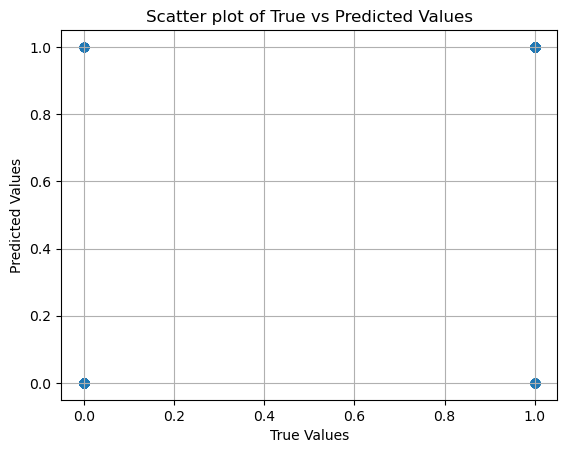

In [53]:
plt.scatter(ytest,ypred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter plot of True vs Predicted Values')
plt.grid(True)
plt.show()

<hr style="border:2px solid gray">

## Model tuning: 
*Use the learning curves to tune the hyperparameters of the model to improve its performance.*
- *Code [/10]: the code works; it is well-written, formatted, and appropriately explained*
- *Figures [/10]: the figures are relevant to the tasks, they have legends and axis titles, and the figures are easily readable and interpretabl*
- *Text [/5]: the text justifies the tuning of the hyper parameters appropriate*ly.


<hr style="border:2px solid gray">

## Word count

Run the cell below to get a word count of the Markdown cells.

In [ ]:
import io
from nbformat import current

filepath='MidtermProject_Pulsars.ipynb'

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_instructions = 648
word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("The total word count (excluding instructions) is:", word_count-word_instructions)

<hr style="border:2px solid gray">

## Saving, downloading and uploading to QMPlus

To submit your assignment you will need to upload two files onto QMPlus. These are:
 * Your jupyter notebook
 * A PDF version of your jupyter notebook
To save these two files go on `File`, and select `Download as` from the drop down menu, then select: `Notebook (ipynb)` to download the jupyter notebook (*Note that you won't be able to open this file from your computer, please upload it as is to QMPlus.*). Similarly, use `PDF` to download a PDF copy of your work.